In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.3'

In [191]:
def _scatter2d(data, x_d, y_d, n_clusters, _min=-2, _max=2, colors=None):
    plt.rcParams['figure.facecolor'] = '0.2'
    plt.axes().set_facecolor('black')
    x = data[:, x_d]
    y = data[:, y_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        plt.scatter(x[idx], y[idx], c=colors[i])

    plt.xlabel(f"d{x_d}")
    plt.ylabel(f"d{y_d}")
    #plt.xlim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    #plt.ylim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    plt.show()

In [192]:
def _scatter3d(data, x_d, y_d, z_d, n_clusters, _min=-.2, _max=.2, colors=None):
    fig = plt.figure()
    fig.patch.set_facecolor('0.2')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('0.2')
    x = data[:, x_d]
    y = data[:, y_d]
    z = data[:, z_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        ax.scatter(x[idx], y[idx], z[idx], c=colors[i])
        
    ax.set_xlabel(f"d{x_d}")
    ax.set_ylabel(f"d{y_d}")
    ax.set_zlabel(f"d{z_d}")
    #ax.set_xlim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    #ax.set_ylim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    #ax.set_zlim(data[:, z_d].min()+_min, data[:, z_d].max()+_max)
    plt.show()

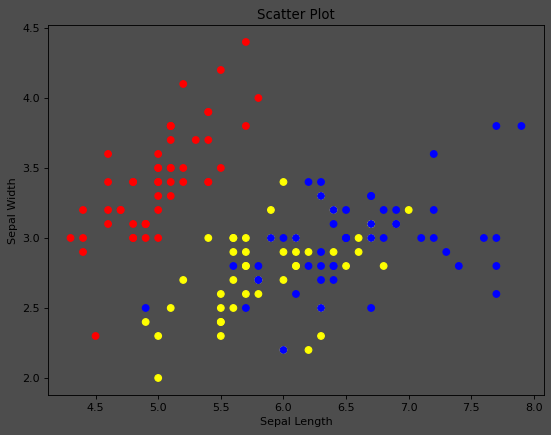

In [193]:
x1 = []
x2 = []
x3 = [] 
colors = []

iris_colors = {'Iris-setosa' : 'red',
               'Iris-versicolor' : 'yellow',
               'Iris-virginica' : 'blue'}

with open("iris.csv", "r") as fobj:
    for line in fobj:
        words = line.rstrip().split(",")
        if len(words) != 5:
            continue
        x1.append(float(words[0]))
        x2.append(float(words[1]))
        x3.append(float(words[2]))
        colors.append(iris_colors[words[4]])

plt.figure(figsize=(8, 6), dpi=80)
plt.axes().set_facecolor('0.3')        
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.scatter(np.array(x1), np.array(x2), color=colors)
plt.grid(False)
plt.show()

---------

In [194]:
_map = {'Iris-versicolor': 1,'Iris-virginica': 2,'Iris-setosa': 0}

df = pd.read_csv('iris.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
#df['class'].replace(_map, inplace=True)
df['num_class'] = df['class'].map(_map)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
 5   num_class     149 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [196]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [197]:
df['num_class']

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: num_class, Length: 149, dtype: int64

In [198]:
np_data = df.values
np_data[:8]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa', 0],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa', 0],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa', 0],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa', 0],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa', 0],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa', 0],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa', 0],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 0]], dtype=object)

In [199]:
np_data.shape

(149, 6)

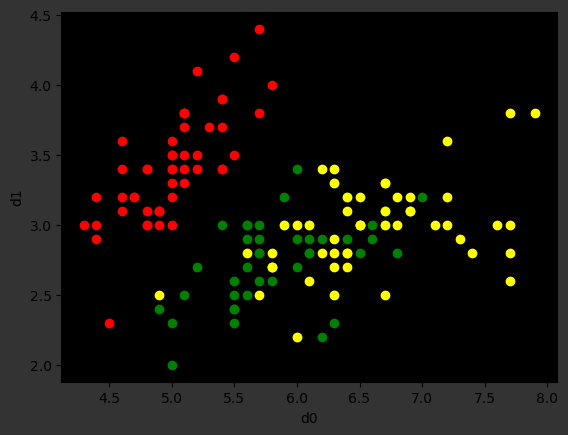

In [200]:
_scatter2d(np_data,0,1,3,colors=['red','green','yellow'])

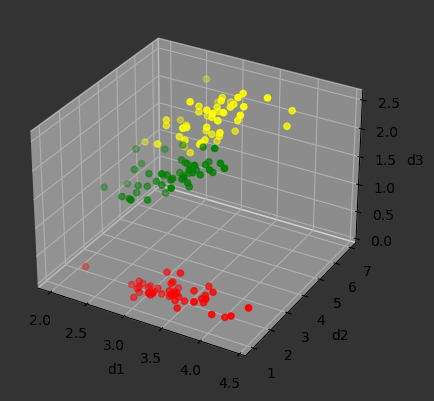

In [201]:
_scatter3d(np_data,1,2,3,3, colors=['red','green','yellow'])

In [202]:
%matplotlib notebook

In [203]:
%matplotlib inline

In [204]:
X = df.iloc[:, :-2].values
X[:8]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [205]:
X_centered = X - np.mean(X, axis=0)
X_ = np.c_[X_centered, np_data[:,-1]]
X_centered

array([[-0.95, -0.05, -2.37, -1.01],
       [-1.15,  0.15, -2.47, -1.01],
       [-1.25,  0.05, -2.27, -1.01],
       [-0.85,  0.55, -2.37, -1.01],
       [-0.45,  0.85, -2.07, -0.81],
       [-1.25,  0.35, -2.37, -0.91],
       [-0.85,  0.35, -2.27, -1.01],
       [-1.45, -0.15, -2.37, -1.01],
       [-0.95,  0.05, -2.27, -1.11],
       [-0.45,  0.65, -2.27, -1.01],
       [-1.05,  0.35, -2.17, -1.01],
       [-1.05, -0.05, -2.37, -1.11],
       [-1.55, -0.05, -2.67, -1.11],
       [-0.05,  0.95, -2.57, -1.01],
       [-0.15,  1.35, -2.27, -0.81],
       [-0.45,  0.85, -2.47, -0.81],
       [-0.75,  0.45, -2.37, -0.91],
       [-0.15,  0.75, -2.07, -0.91],
       [-0.75,  0.75, -2.27, -0.91],
       [-0.45,  0.35, -2.07, -1.01],
       [-0.75,  0.65, -2.27, -0.81],
       [-1.25,  0.55, -2.77, -1.01],
       [-0.75,  0.25, -2.07, -0.71],
       [-1.05,  0.35, -1.87, -1.01],
       [-0.85, -0.05, -2.17, -1.01],
       [-0.85,  0.35, -2.17, -0.81],
       [-0.65,  0.45, -2.27, -1.01],
 

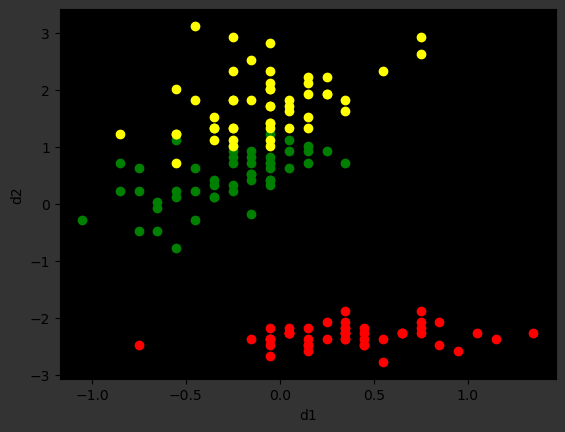

In [206]:
_scatter2d(X_, 1, 2, 3, colors=['red','green','yellow'])

In [207]:
X_.shape

(149, 5)

In [208]:
X

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [209]:
arr = np.random.randint(0, 20, size=(10, 2))
arr[:6]

array([[ 5,  5],
       [ 4,  8],
       [12,  1],
       [17,  9],
       [ 1,  9],
       [ 8, 18]])

In [210]:
arr_m = arr + np.array([4, 5])
arr_m[:6]

array([[ 9, 10],
       [ 8, 13],
       [16,  6],
       [21, 14],
       [ 5, 14],
       [12, 23]])

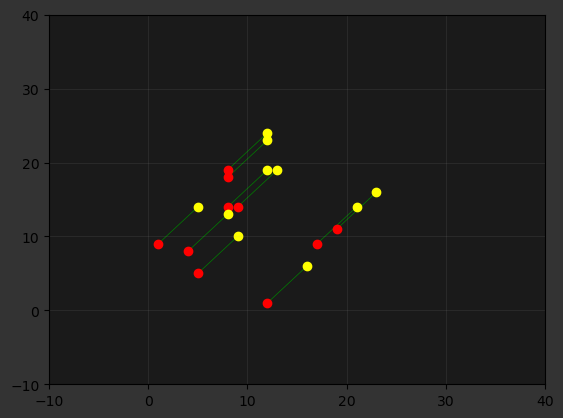

In [211]:
plt.axes().set_facecolor('0.1')
plt.scatter(arr[:, 0], arr[:, 1], c='red')
plt.scatter(arr_m[:, 0], arr_m[:, 1], c='yellow')
for i in range(len(arr)):
    plt.plot([arr[i, 0], arr_m[i, 0]], [arr[i, 1], arr_m[i, 1]],c='green',linewidth=.5, zorder=0)

plt.xlim(-10,40)
plt.ylim(-10,40)
plt.grid(alpha=0.1)
plt.show()

In [212]:
arr2 = np.random.randint(0, 10, size=(20, 3))
arr_m2 = arr2 + np.array([8, 8, 8])
arr2.shape

(20, 3)

<IPython.core.display.Javascript object>


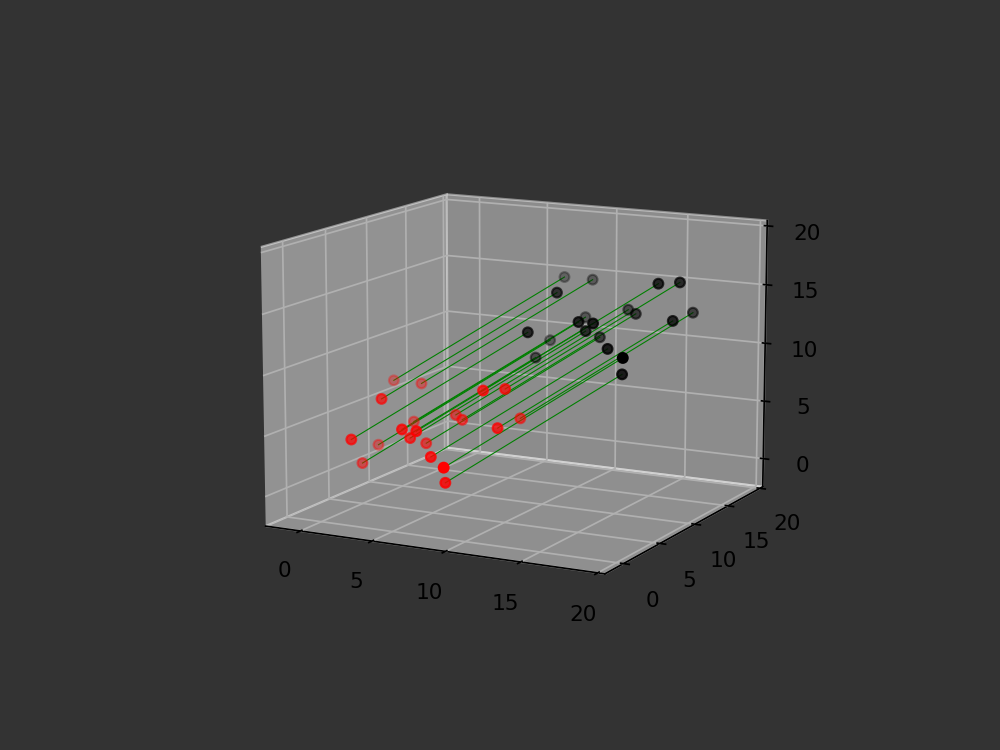

In [215]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(arr2[:,0], arr2[:,1], arr2[:,2], c='red')
ax.scatter(arr_m2[:,0], arr_m2[:,1], arr_m2[:,2], c='black')
for i in range(len(arr2)):
    plt.plot([arr2[i, 0], arr_m2[i, 0]], [arr2[i, 1], arr_m2[i, 1]], [arr2[i, 2], arr_m2[i, 2]],c='g',linewidth=.5, zorder=0)

ax.set_xlim(-2, 20)
ax.set_ylim(-2, 20)
ax.set_zlim(-2, 20)
plt.show()    

In [214]:
%matplotlib notebook